In [3]:
import json

In [4]:
# from pyspark import SparkContext
# sc = SparkContext.getOrCreate()

In [5]:
import os
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [6]:
from numpy import array
from math import sqrt

from pyspark.mllib.clustering import KMeans, KMeansModel

# Load and parse the data
# Read data in json format
df = spark.read.json("Movies_and_TV_5.json")

In [4]:
from pyspark import SparkContext
from pyspark.sql.types import *
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit
from functools import reduce
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import pandas as pd
import re
import string

In [5]:
df.show(5)

+----------+-------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+
|      asin|helpful|overall|          reviewText| reviewTime|    reviewerID|        reviewerName|             summary|unixReviewTime|
+----------+-------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+
|0005019281| [0, 0]|    4.0|This is a charmin...|02 26, 2008| ADZPIG9QOCDG5|Alice L. Larson "...|good version of a...|    1203984000|
|0005019281| [0, 0]|    3.0|It was good but n...|12 30, 2013|A35947ZP82G7JH|       Amarah Strack|Good but not as m...|    1388361600|
|0005019281| [0, 0]|    3.0|Don't get me wron...|12 30, 2013|A3UORV8A9D5L2E|     Amazon Customer|Winkler's Perform...|    1388361600|
|0005019281| [0, 0]|    5.0|Henry Winkler is ...|02 13, 2008|A1VKW06X1O2X7V|Amazon Customer "...|It's an enjoyable...|    1202860800|
|0005019281| [0, 0]|    4.0|This is one of th...|12 22, 2013|A

In [6]:
import json
import pandas as pd
data_df = pd.read_json('Movies_and_TV_5.json', lines=True)

In [7]:
data_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ADZPIG9QOCDG5,0005019281,"Alice L. Larson ""alice-loves-books""","[0, 0]",This is a charming version of the classic Dick...,4,good version of a classic,1203984000,"02 26, 2008"
1,A35947ZP82G7JH,0005019281,Amarah Strack,"[0, 0]",It was good but not as emotionally moving as t...,3,Good but not as moving,1388361600,"12 30, 2013"
2,A3UORV8A9D5L2E,0005019281,Amazon Customer,"[0, 0]","Don't get me wrong, Winkler is a wonderful cha...",3,Winkler's Performance was ok at best!,1388361600,"12 30, 2013"
3,A1VKW06X1O2X7V,0005019281,"Amazon Customer ""Softmill""","[0, 0]",Henry Winkler is very good in this twist on th...,5,It's an enjoyable twist on the classic story,1202860800,"02 13, 2008"
4,A3R27T4HADWFFJ,0005019281,BABE,"[0, 0]",This is one of the best Scrooge movies out. H...,4,Best Scrooge yet,1387670400,"12 22, 2013"
...,...,...,...,...,...,...,...,...,...
1697528,AV657BUYHHXZ2,B00LT1JHLW,"Mike Rules ""Mike""","[1, 14]",wow $269.99 for the entire series on Blu Ray??...,1,Way to Expensive!! WB = GREED,1406073600,"07 23, 2014"
1697529,A17W587EH23J0Q,B00LT1JHLW,"Ron2900 ""Ron""","[32, 48]","Finally, the holy grail of tv-on-dvd boxsets i...",5,"HOLY BAT-BOXSET, BATMAN... I never thought thi...",1405641600,"07 18, 2014"
1697530,A3DE438TF1A958,B00LT1JHLW,thomas henry,"[3, 10]",Could this be a true or I'm i dreaming batman ...,5,prayers have been answered because batman 60s ...,1405728000,"07 19, 2014"
1697531,A2RWCXDMANY0LW,B00LT1JHLW,wheev,"[0, 4]",I've been a fan of the series since I was a yo...,5,can't Wait!,1405987200,"07 22, 2014"


In [8]:
import seaborn as sns
sns.pairplot(data_df)

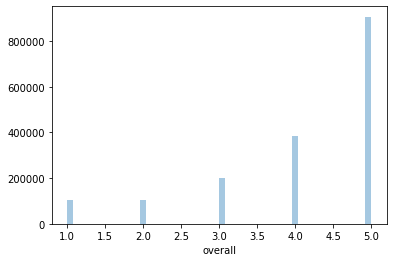

In [9]:
from matplotlib import pyplot as plt
sns.distplot(data_df['overall'],kde = False)
plt.show()

In [10]:
data_df.count()

reviewerID        1697533
asin              1697533
reviewerName      1691457
helpful           1697533
reviewText        1697533
overall           1697533
summary           1697533
unixReviewTime    1697533
reviewTime        1697533
dtype: int64

In [11]:
from pyspark.sql.types import *
from pyspark.sql.functions import col, lit
from functools import reduce
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import pandas as pd
import re
import string

In [12]:
df.printSchema()

root
 |-- asin: string (nullable = true)
 |-- helpful: array (nullable = true)
 |    |-- element: long (containsNull = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- unixReviewTime: long (nullable = true)



In [25]:
df_n = df.select("reviewText")

In [14]:
df.describe("overall").show()

+-------+------------------+
|summary|           overall|
+-------+------------------+
|  count|           1697533|
|   mean| 4.110648217148062|
| stddev|1.1976147523955183|
|    min|               1.0|
|    max|               5.0|
+-------+------------------+



## Remove netutal: overall = 3

In [33]:
df1 = df.filter("overall != 3")

In [34]:
from pyspark.ml.feature import Bucketizer
splits = [-float("inf"), 4, float("inf")]
bucketizer = Bucketizer(splits=splits, inputCol="overall", outputCol="label")

In [35]:
df2= bucketizer.transform(df1)

In [42]:
df2.groupBy("overall","label").count().show()

+-------+-----+------+
|overall|label| count|
+-------+-----+------+
|    2.0|  0.0|102410|
|    5.0|  1.0|906608|
|    1.0|  0.0|104219|
|    4.0|  1.0|382994|
+-------+-----+------+



In [50]:
df3 = df2.groupBy("reviewText","label").count().show()

+--------------------+-----+-----+
|          reviewText|label|count|
+--------------------+-----+-----+
|This is one of my...|  1.0|    1|
|Great great great...|  1.0|    1|
|The story: pricel...|  1.0|    1|
|Good depiction an...|  1.0|    1|
|This is a fantast...|  1.0|    1|
|A beautiful trans...|  1.0|    1|
|i have to say tha...|  1.0|    1|
|Comes on two DVD'...|  1.0|    1|
|Karajan had an ea...|  1.0|    1|
|This one should b...|  1.0|    1|
|My then 2 year ol...|  1.0|    1|
|This is a powerfu...|  1.0|    1|
|"From the Earth t...|  1.0|    1|
|"New Nightmare",i...|  1.0|    1|
|"Poetry in Motion...|  1.0|    1|
|"Seven" is one of...|  1.0|    1|
|&quot;Scarface&qu...|  1.0|    1|
|&quot;Stir of Ech...|  1.0|    1|
|'American Psycho'...|  0.0|    1|
|(4 stars is gener...|  1.0|    1|
+--------------------+-----+-----+
only showing top 20 rows



## train, test split

In [56]:
tokenizer = Tokenizer(inputCol="reviewText", outputCol="reviewTokenUF")
regexTokenizer = RegexTokenizer(inputCol="reviewText", outputCol="reviewTokenUF", pattern="\\s+|[,.()\"]")

In [57]:
df_tokenized = tokenizer.transform(df2)

In [62]:
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover(inputCol="reviewTokenUF", outputCol="filtered")

In [63]:
df_removed = remover.transform(df_tokenized)

In [64]:
# Convert to TF words vector
hashingTF = HashingTF(inputCol="filtered", outputCol="rawFeatures")
df_TF = hashingTF.transform(df_removed)

In [65]:
# Convert to TF*IDF words vector
idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(df_TF)
df_idf = idfModel.transform(df_TF)

In [66]:
for features_label in df_idf.select("features", "label").take(3):
    print(features_label)

Row(features=SparseVector(262144, {5795: 5.9329, 27787: 4.9392, 44041: 5.9536, 47032: 2.8373, 48089: 8.3351, 67984: 6.3346, 89717: 2.0029, 91935: 6.064, 92646: 3.9549, 113432: 1.3503, 115917: 2.262, 122798: 5.0026, 125892: 4.3854, 135276: 4.7134, 138078: 4.1405, 140931: 2.2081, 163689: 4.114, 174966: 1.7041, 186480: 3.4438, 197339: 2.7163, 210606: 4.1782, 212508: 2.9263, 218882: 3.6636, 239740: 6.9996, 249180: 2.4182, 250475: 2.3903, 260996: 8.2678}), label=1.0)
Row(features=SparseVector(262144, {5795: 2.9664, 35028: 3.3592, 67984: 6.3346, 107367: 2.6081, 107925: 5.8062, 113432: 1.3503, 115518: 4.5434, 122120: 6.0362, 122798: 5.0026, 126899: 6.6256, 135533: 2.6013, 170993: 1.7087, 212508: 2.9263, 218834: 3.4357, 260027: 6.1956}), label=1.0)
Row(features=SparseVector(262144, {4200: 2.4711, 22641: 7.9475, 26052: 4.6371, 63443: 2.9669, 67984: 6.3346, 117481: 2.8162, 121200: 2.1118, 122798: 5.0026, 123874: 3.698, 125372: 0.9988, 166027: 1.9147, 174144: 5.0749, 181565: 4.1803, 204596: 7.790

# split data

In [75]:
# Split data aproximately into training (80%) and test (20%)
# train, test =df2.randomSplit([0.8,0.2], seed = 1234)